In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine, reflect=True)

In [6]:
# View all of the classes that automap found
class_names = base.classes.keys()

for name in class_names:
    print(name)

measurement
station


In [7]:
# Save references to each table
measurment = base.classes.measurement
station = base.classes.station
#! print(station.__dict__)
#! print(measurment.__dict__)

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date_str = session.query(func.max(measurment.date)).scalar()

#convert back to date object
recent_date = dt.datetime.strptime(recent_date_str, "%Y-%m-%d").date()
print(recent_date)

2017-08-23


Text(0, 0.5, 'Precipition in inches')

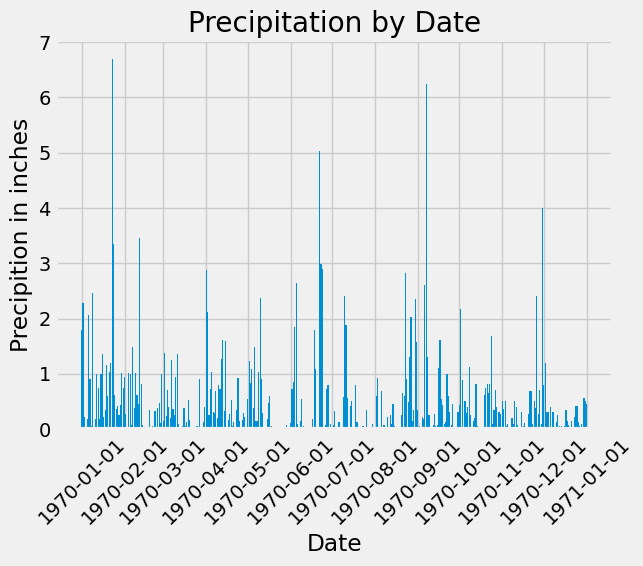

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

oldDate = recent_date - dt.timedelta(days=365)
#! print(oldDate)

# Perform a query to retrieve the data and precipitation scores
stationID = []
date = []
prcp = []
tobs = []

twelveMonths = session.query(measurment).\
    filter(measurment.date >= oldDate).all()

for month in twelveMonths:
    stationID.append(month.station)
    date.append(month.date)
    prcp.append(month.prcp)
    tobs.append(month.tobs)

#! print(stationID, date, prcp, tobs)
#! print(f"Station {month.station} on {month.date} had {month.prcp} inches of rain.")


# Save the query results as a Pandas DataFrame. Explicitly set the column names
results = {"Station ID": stationID, "Date": date, "Precipitation": prcp,
            "Tobs": tobs}
results_df = pd.DataFrame(results)
#! results_df.head()

# Sort the dataframe by date
results_df = results_df.sort_values(by=["Date"])
sorted_data = results_df.reset_index(drop=True)
#! sorted_data

# Use Pandas Plotting with Matplotlib to plot the data
x_values = sorted_data["Date"]
y_values = sorted_data["Precipitation"]

fig, ax = plt.subplots()

ax.bar(x_values, y_values)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#plt.bar(x_values, y_values)
plt.xticks(rotation = 45)
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipition in inches")


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_data[["Precipitation"]].describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

result = session.query(measurment.station, func.count(measurment.station)).\
    group_by(measurment.station).\
    order_by(func.count(measurment.station).desc()).\
    all()
result


for station, count in result:
    print(f"Station: {station} shows up {count} times.")



Station: USC00519281 shows up 2772 times.
Station: USC00519397 shows up 2724 times.
Station: USC00513117 shows up 2709 times.
Station: USC00519523 shows up 2669 times.
Station: USC00516128 shows up 2612 times.
Station: USC00514830 shows up 2202 times.
Station: USC00511918 shows up 1979 times.
Station: USC00517948 shows up 1372 times.
Station: USC00518838 shows up 511 times.


In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(measurment.tobs)).\
    filter(measurment.station == "USC00519281").\
    scalar()
print(f"The lowest temp of station USC00519281 was {low_temp} degrees.")

high_temp = session.query(func.max(measurment.tobs)).\
    filter(measurment.station == "USC00519281").\
    scalar()
print(f"The highest temp of station USC00519281 was {high_temp} degrees.")

avg_temp = session.query(func.round(func.avg(measurment.tobs)), 2).\
    filter(measurment.station == "USC00519281").\
    scalar()
print(f"The average temp of station USC00519281 was {avg_temp} degrees.")

The lowest temp of station USC00519281 was 54.0 degrees.
The highest temp of station USC00519281 was 85.0 degrees.
The average temp of station USC00519281 was 72.0 degrees.


In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
recent_station_date_str = session.query(func.max(measurment.date)).\
    filter(measurment.station == "USC00519281").\
    scalar()

#convert back to date object
recent_station_date = dt.datetime.strptime(recent_station_date_str, "%Y-%m-%d").date()
#! print(recent_station_date)

#find the date 12 months ago
old_station_date = recent_station_date - dt.timedelta(days=365)
#! print(old_station_date)

#gather data
new_stationID = []
new_date = []
new_prcp = []
new_tobs = []

twelveMonthsStation = session.query(measurment).\
    filter(measurment.date >= old_station_date).all()

for month in twelveMonths:
    new_stationID.append(month.station)
    new_date.append(month.date)
    new_prcp.append(month.prcp)
    new_tobs.append(month.tobs)


active_station = {"Station ID": new_stationID, "Date": new_date, "Precipitation": new_prcp,
            "Tobs": new_tobs}
active_station_df = pd.DataFrame(active_station)
active_station_df.head()

,Station ID,Date,Precipitation,Tobs
0,USC00519397,2016-08-23,0.00,81.0
1,USC00519397,2016-08-24,0.08,79.0
2,USC00519397,2016-08-25,0.08,80.0
3,USC00519397,2016-08-26,0.00,79.0
4,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...
2225,USC00516128,2017-08-19,0.09,71.0
2226,USC00516128,2017-08-20,NaN,78.0
2227,USC00516128,2017-08-21,0.56,76.0
2228,USC00516128,2017-08-22,0.50,76.0


Text(0, 0.5, 'Frequency')

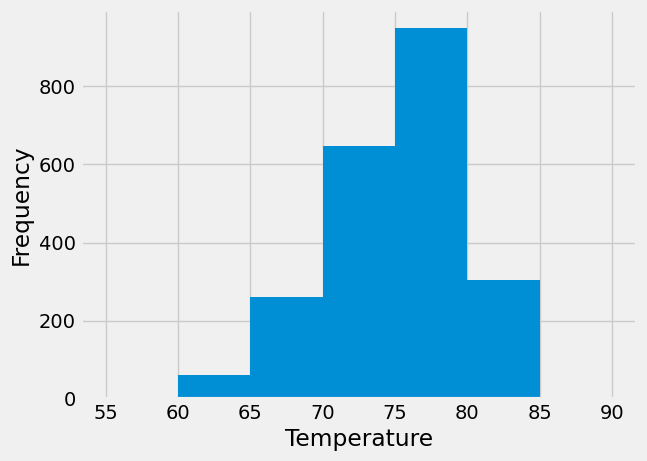

In [75]:
#plot the results as a histogram
#! active_station_df["Tobs"].min()
#! active_station_df["Tobs"].max()

x_values_new = active_station_df["Tobs"]
bins = [55, 60, 65, 70, 75, 80, 85, 90]
plt.hist(x_values_new, bins)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [16]:
# Close Session
session.close()